"""
Name: Sundeep Ravichander
Library:plotnine (ggplot for Python)
URL: https://plotnine.readthedocs.io
Description:
This library implements the Grammar of Graphics in Python, enabling concise,
layered, publication-quality visualizations in Python data science workflows.
"""


In [77]:
!pip install ggplot
!pip install plotnine
import pandas as pd 
from pathlib import Path
from plotnine import(
ggplot, aes, geom_point, geom_smooth,geom_histogram, labs,geom_col,
geom_boxplot,facet_grid,theme_xkcd, theme_minimal,facet_wrap,theme_xkcd
)



Step 1 : Data: Here we are using the Boston Housing Data set for the  review and we read it with the help of  Pandas

In [70]:
DATA_PATH = "/Users/sundeepravichander/OIM7502_F25/BostonHousing.csv"

def load_csv(path: str):
    """Load CSV safely with encoding fallbacks."""
    try:
        return pd.read_csv(path)
    except UnicodeDecodeError:
        for enc in ("latin1", "ISO-8859-1", "cp1252"):
            try:
                return pd.read_csv(path, encoding=enc)
            except UnicodeDecodeError:
                continue
        raise

df = load_csv(DATA_PATH)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,ISHIGHVAL
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


The very first step in the Grammar of Graphics is the Data Layer. For this demo I would be using the Boston Housing dataset.  This contains data about  housing values and socio economic conditions for various  neighborhoods in the Boston area
Each row represents a single observation..

**DATA Dictionary**

CRIM – Per capita crime rate by town

ZN – Proportion of residential land zoned for large lots

INDUS – Proportion of non-retail business acres per town

CHAS – Dummy variable indicating proximity to the Charles River (1 = yes, 0 = no)

NOX – Nitric oxide concentration (pollution level)

RM – Average number of rooms per dwelling

AGE – Proportion of older buildings (built before 1940)

DIS – Weighted distance to employment centers

RAD – Accessibility to radial highways

TAX – Property tax rate per $10,000

PTRATIO – Pupil-teacher ratio

LSTAT – Percentage of lower-status population

MEDV – Median value of owner-occupied homes (in $1000s)

ISHIGHVAL – Binary flag (1 = high-value home, 0 = lower-value home) 

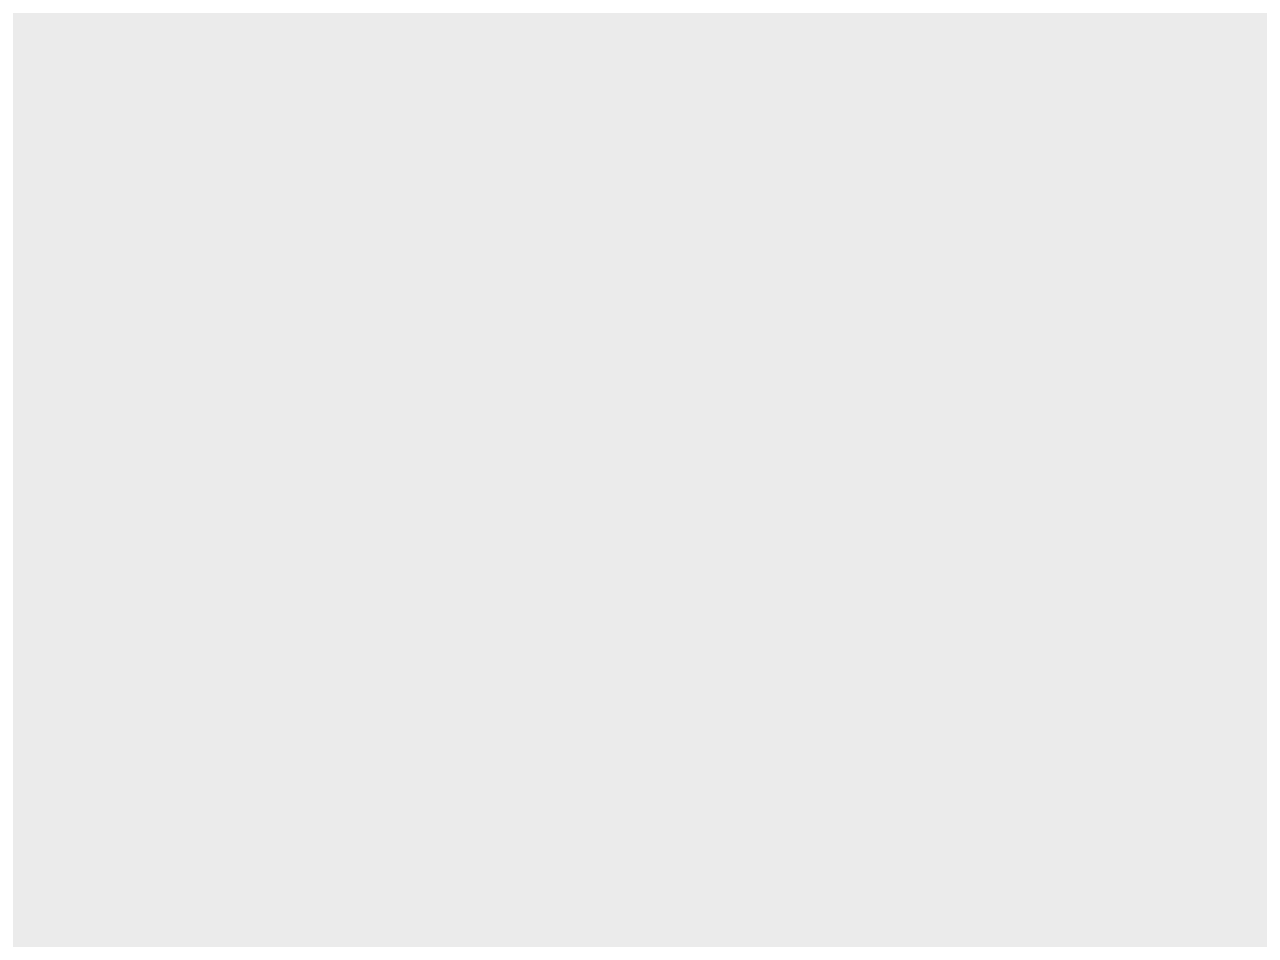

In [44]:
DATA_PATH = Path("/Users/sundeepravichander/OIM7502_F25/BostonHousing.csv")
df = pd.read_csv(DATA_PATH)


# passing the data to the ggplot constructor
ggplot(df)

We load Boston Housing dataset into Pandas dataframe using the read_csv() function. After loading the data, we initialize a plot object for  the dataset using the ggplot() function from the plotnine library
At this instance the output will appear blank as we have not specified the other two  components.

2. Aesthetics:

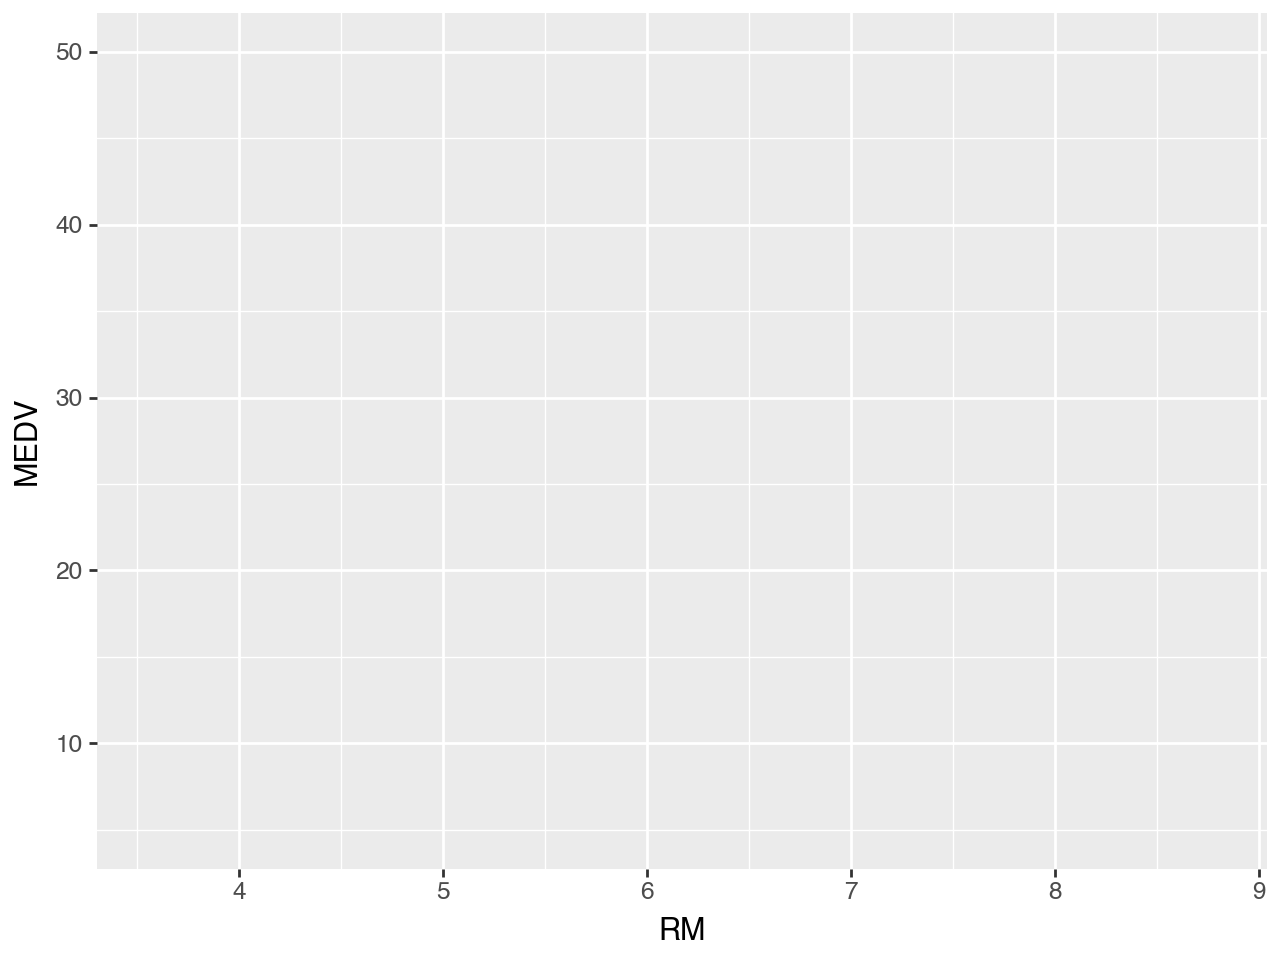

In [10]:
ggplot(df) + aes(x="RM", y="MEDV") 

This step involves defining which variables from the dataset correspond to the x and y axes, colors, shapes and other attributes. For 

Geometric Objects:

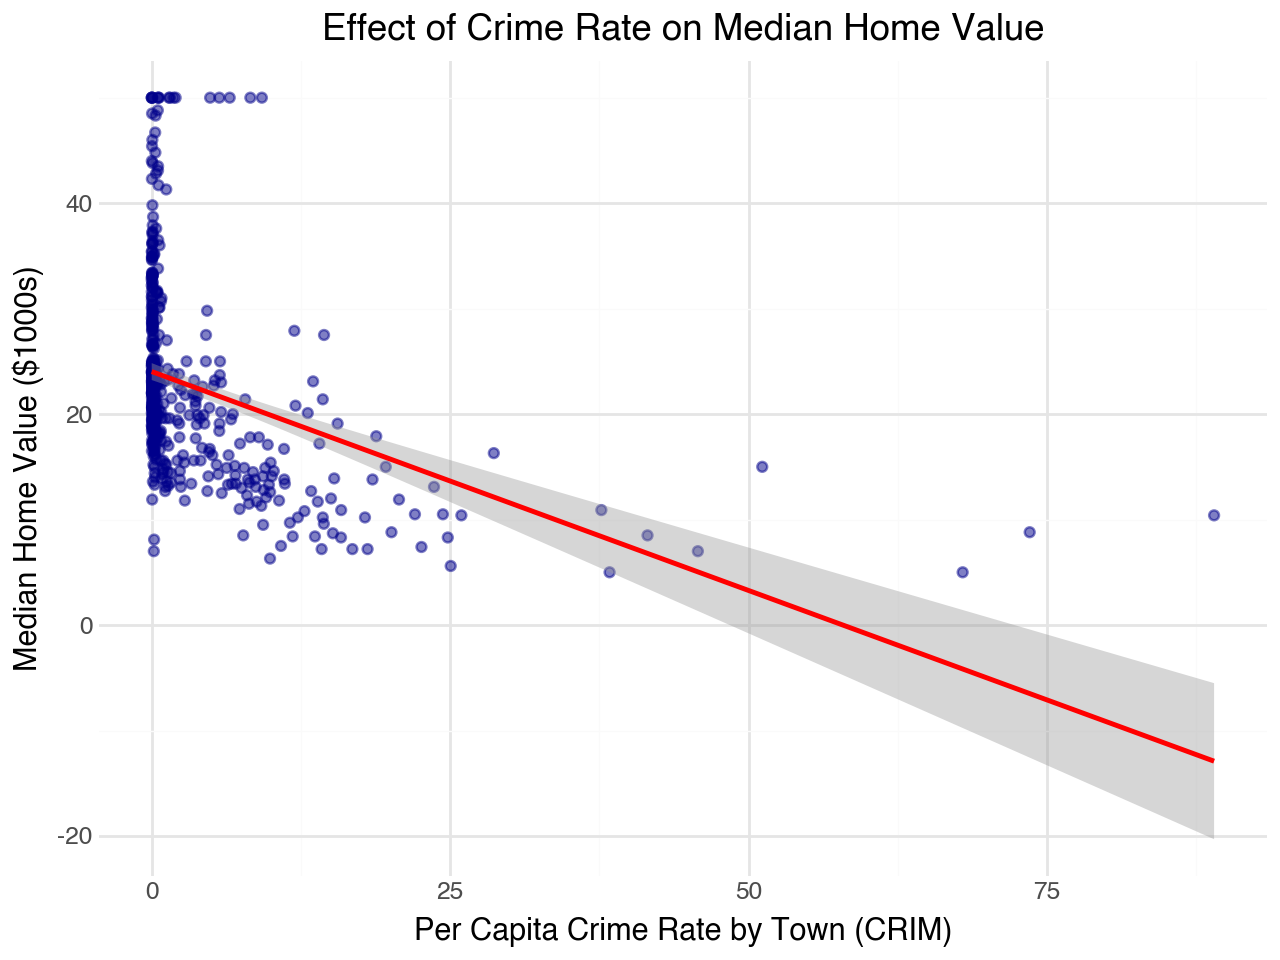

In [12]:
(
    ggplot(df)
    + aes(x="CRIM", y="MEDV")
    + geom_point(alpha=0.5, color="darkblue")
    + geom_smooth(method="lm", color="red", se=True)
    + labs(
        title="Effect of Crime Rate on Median Home Value",
        x="Per Capita Crime Rate by Town (CRIM)",
        y="Median Home Value ($1000s)"
    )
    + theme_minimal()
)

**In this step the objective is to introduce the Geometric Objects layer**. This scatter plot visualizes the relationship between per capita crime rate (CRIM) and median home value (MEDV) using data from the Boston Housing dataset.
Each blue dot represents a neighborhood, and the red line (with the shaded confidence interval) is a linear regression fit
For towns with very low crime rates **(CRIM < 5)**, median home values typically fall between **20K and 45K**.

For towns with high crime rates **(CRIM > 20)**, home values often drop below  **15K**, with some neighborhoods even dipping near **5K** or lower.

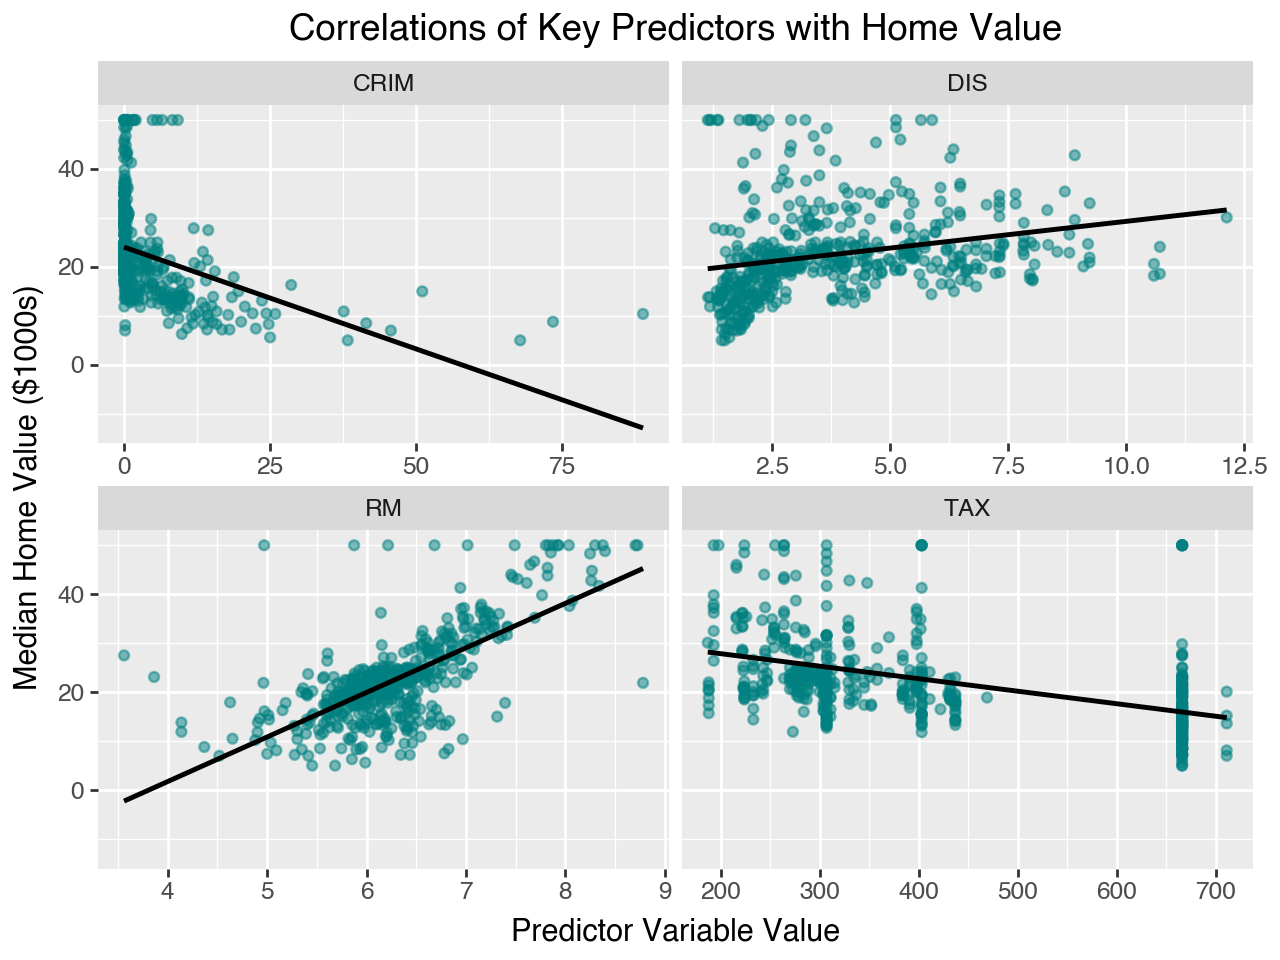

In [21]:
(
    ggplot(df.melt(id_vars="MEDV", value_vars=["RM", "CRIM", "DIS", "TAX"]))
    + aes(x="value", y="MEDV")
    + geom_point(alpha=0.5, color="teal")
    + facet_wrap("variable", scales="free_x")
    + geom_smooth(method="lm", color="black", se=False)
    + labs(
        title="Correlations of Key Predictors with Home Value",
        x="Predictor Variable Value",
        y="Median Home Value ($1000s)"
    )
)

Each subplot shows the relationship between **Median Home Value (MEDV)** and one of four predictor variables from the Boston Housing dataset: 


1) **CRIM: Per capita crime rate by town** 
2) **DIS: Distance to employment centers**
3) **RM: Average number of rooms per dwelling**
4) **TAX: Property tax rate**

A linear regression line (black) shows the trend.

From the visualization, it is clear that the median home value in Boston is influenced by a combination of socioeconomic and physical neighborhood factors. Areas with higher crime rates **(CRIM)** tend to have significantly lower home values, indicating that safety is a major determinant of real estate pricing. Conversely, neighborhoods with larger homes (higher RM values) show a strong upward trend in median value, confirming that housing size and quality remain primary drivers of price appreciation.

The distance to employment centers **(DIS)** shows a mild positive relationship with home value, suggesting that homes located slightly farther from urban congestion may offer a more desirable living.On the other hand, higher property tax rates **(TAX)** are associated with lower housing prices, reflecting how increased fiscal burdens can reduce overall affordability.

Among all predictors, **RM (number of rooms)** and **CRIM (crime rate)** are the strongest determinants of housing prices.

**Higher crime and tax rates depress property values.**

**More rooms and greater distance from urban congestion raise property values.**

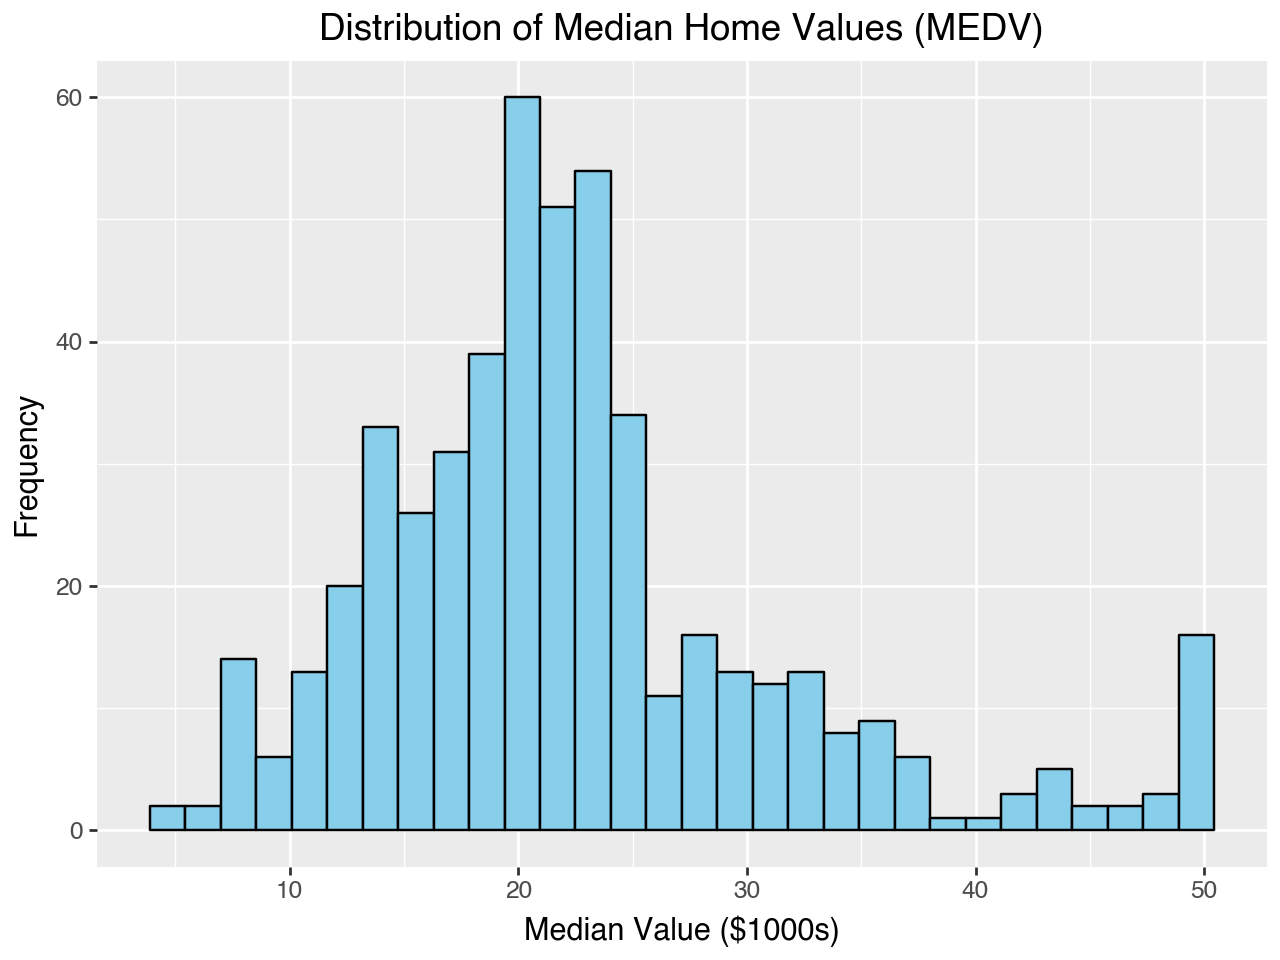

In [82]:
# Create histogram
(
    ggplot(df)
    + aes(x="MEDV")
    + geom_histogram(bins=30, fill="skyblue", color="black")
    + labs(
        title="Distribution of Median Home Values (MEDV)",
        x="Median Value ($1000s)",
        y="Frequency"
    )

)

**In this step we explore the Statistical Trasnformation:**
A Statistical Transformation is used to summarize  oir transform the data before it is plotted.
Here we are using the geom_histogram() to group the data in bins.The values of MEDV — the median home value — into intervals and count how many observations fall into each bin.
The Histogram shown above  displays the distribution  of home values across Boston neighborhoods. 
**Most of the homes are clustered around the 20,000 to 25,000 range.**

**Coordinate**


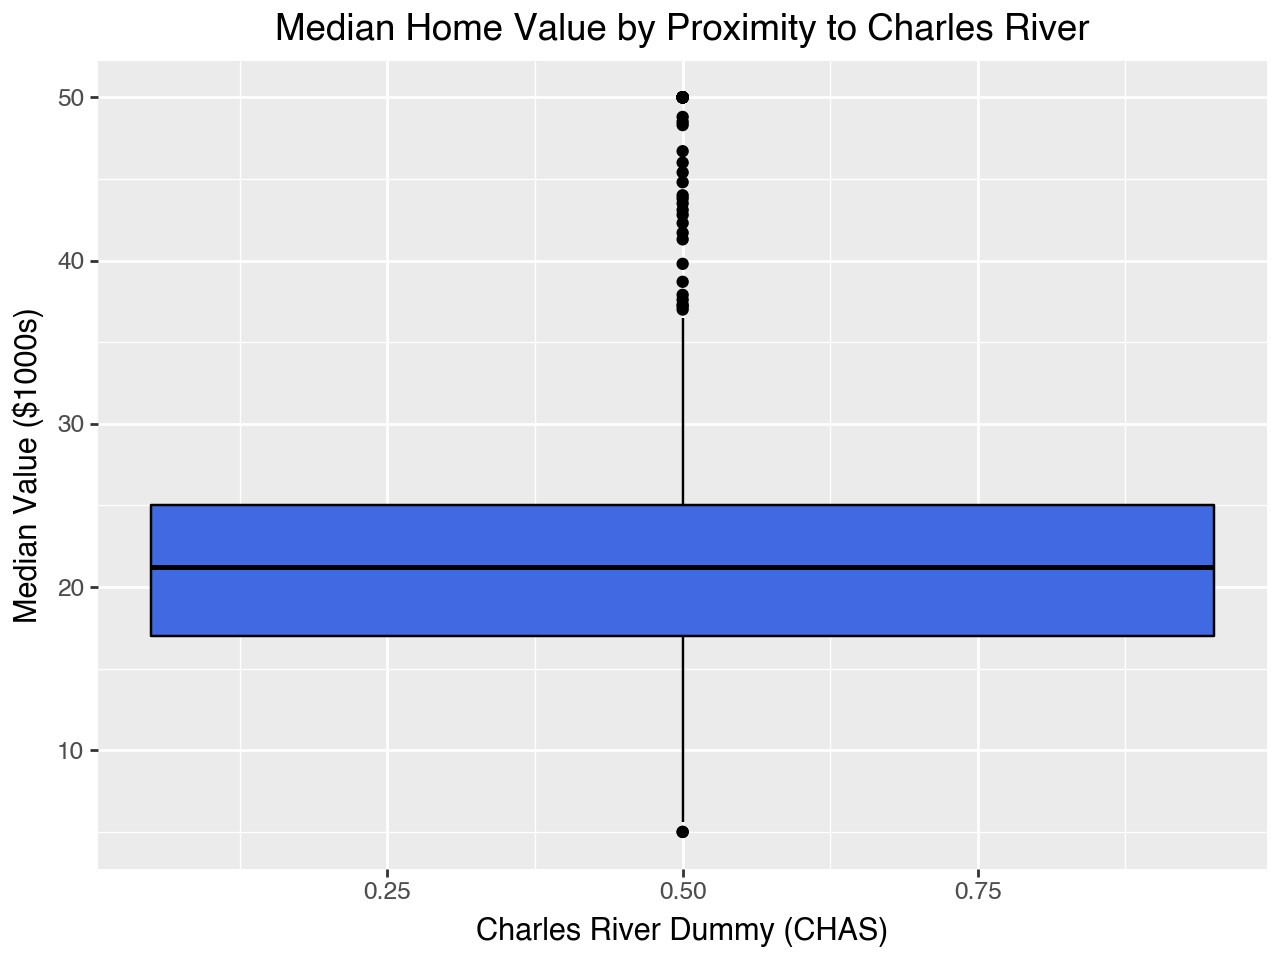

In [32]:

(
    ggplot(df)
    + aes(x="CHAS", y="MEDV")
    + geom_boxplot(fill="royalblue", color="black")
    + labs(
        title="Median Home Value by Proximity to Charles River",
        x="Charles River Dummy (CHAS)",
        y="Median Value ($1000s)"
    )
)



**In this step we explore the Coordinate Systems:**
Coordinate systems define how data points are positioned and interpreted on a two-dimensional plane.
Here we are using a boxplot to compare the distribution  of median home values (MEDV) considering if the neighborhood  borders the Chrales River (CHAS).
The x-axis represents the Charles River dummy variable (CHAS), where 1 indicates homes near the river and 0 indicates homes farther away. The y-axis represents the median home value (in $1000s).
From the above boxplot is is clear that the closer the neighborhood is to the Charles River, Higher is the Median value..

**The median home value (MEDV) for all homes is approximately 21,000 (in $1000s).**

**Homes near the Charles River (CHAS = 1) have a higher median value, around 25,000–27,000, compared to 20,000–21,000 for homes farther from the river (CHAS = 0).**

**The interquartile range (IQR) — the middle 50% of values — spans roughly from 17,000 to 25,000, showing moderate variability in prices.**

**There are several high-value outliers above 40,000–50,000, indicating a small number of luxury or high-end riverfront properties.**

Overall, homes closer to the river show a location premium of about $5,000–$7,000 over those farther away, confirming the influence of proximity to natural amenities on real estate value.


**Layer: Facets — Comparing Subgroups**

This plot uses the Facet layer to compare housing trends by proximity to the Charles River (CHAS).
The chart shows mean median home values (MEDV_mean) across room bins (RM_BIN), with bars colored by building age (AGE_BIN).

From the visualization, homes near the river generally have higher median values, and newer buildings (yellow) tend to be more valuable across all room categories.

/var/folders/2n/lq__dftn5yb18dj6bbxg48jw0000gn/T/ipykernel_5831/3564757716.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:358: PlotnineWarning: position_stack : Removed 5 rows containing missing values.


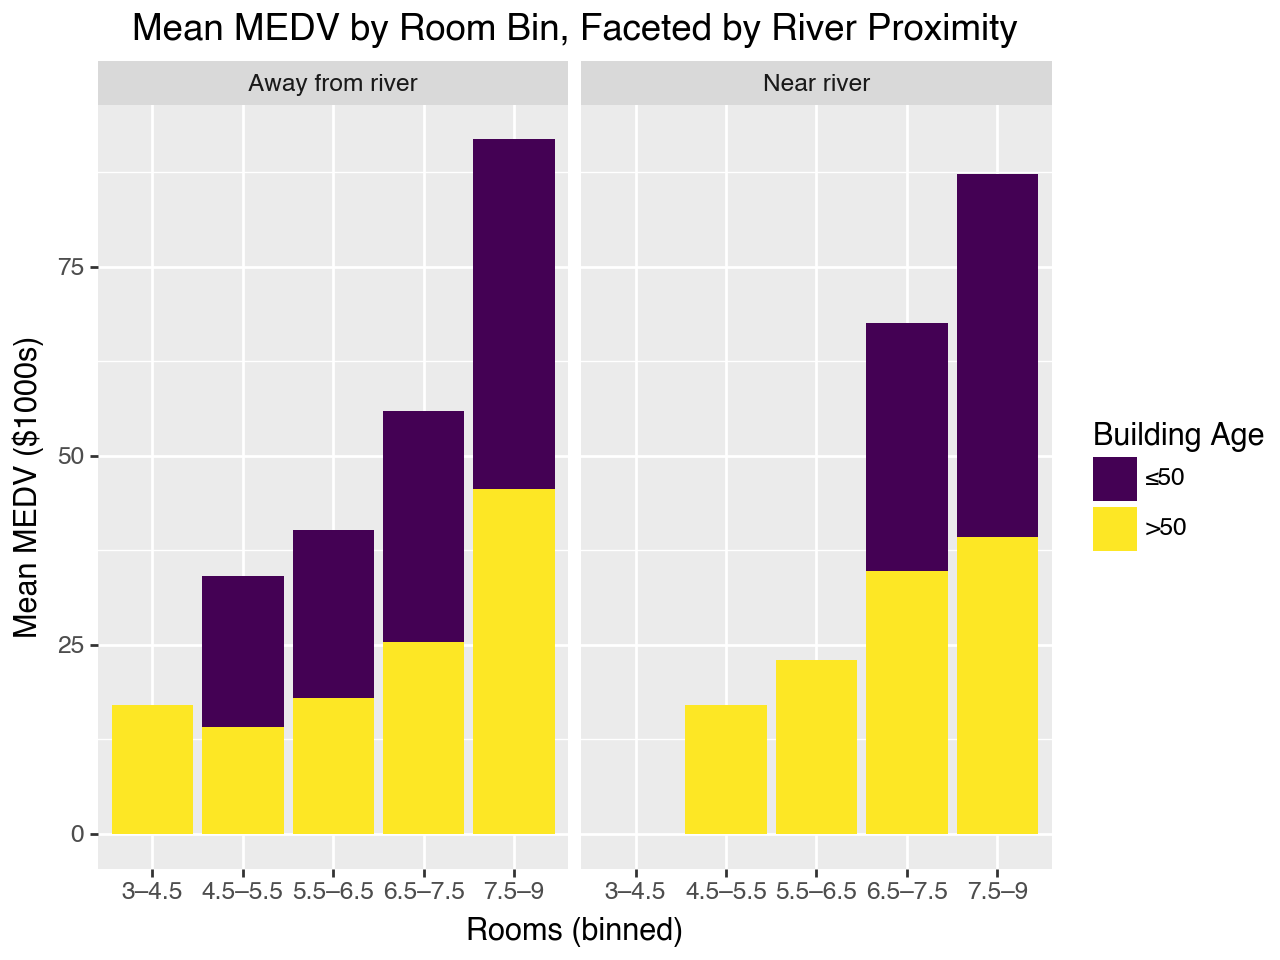

In [89]:
 #1) Create categorical/binned variables
df = df.copy()
df["RM_BIN"] = pd.cut(
    df["RM"],
    bins=[3, 4.5, 5.5, 6.5, 7.5, 9],
    labels=["3–4.5", "4.5–5.5", "5.5–6.5", "6.5–7.5", "7.5–9"],
    include_lowest=True,
)
df["AGE_BIN"] = pd.cut(
    df["AGE"],
    bins=[0, 50, 100],
    labels=["≤50", ">50"],
    include_lowest=True,
)

# 2) Aggregate to get a single y-value per category combo (like tips example)
summary = (
    df.groupby(["CHAS", "RM_BIN", "AGE_BIN"], dropna=False)["MEDV"]
      .mean()
      .reset_index(name="MEDV_mean")
)

# 3) Plot: facet by CHAS, x = RM_BIN, fill = AGE_BIN, y = MEDV_mean (geom_col)
(
    ggplot(summary)
    + facet_grid("~CHAS")  # 
    + aes(x="RM_BIN", y="MEDV_mean", fill="AGE_BIN")
    + geom_col()
    + labs(
        title="Mean MEDV by Room Bin, Faceted by River Proximity",
        x="Rooms (binned)",
        y="Mean MEDV ($1000s)",
        fill="Building Age"
        
    )
    
)

This chart examines how Median Home Value (MEDV) varies with:

Average number of rooms per dwelling (RM) — binned into intervals on the x-axis.

**Building Age (AGE_BIN) — grouped as “≤50” (newer) and “>50” (older).**

**Proximity to the Charles River (CHAS) — represented by the two facets:**

**0: Homes away from the river**

**1: Homes bordering the river**

Across both panels, there is a strong positive relationship between the number of rooms and home value. Homes with **7.5–9 rooms** reach mean MEDV values above **80K, while those with 3–4.5 rooms remain below 20K**, indicating that larger homes command substantially higher prices.

Within each room category, newer homes (≤50 years) consistently show higher values than older ones, highlighting the added premium of modern construction. Furthermore, homes located near the Charles River (CHAS = 1) exhibit slightly higher mean values across all room bins, showing that location adds an additional price advantage independent of age or size.

**In summary, the chart reveals that room size is the strongest driver of home value, while newer construction and river proximity both contribute to further value appreciation — especially among high-end, larger homes.**